<a href="https://www.kaggle.com/kalilurrahman/nyt-covid-19-dataset-time-series-forecasting?scriptVersionId=89807024" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-times-covid19-dataset/us-counties-recent.csv
/kaggle/input/new-york-times-covid19-dataset/us.csv
/kaggle/input/new-york-times-covid19-dataset/us-counties.csv
/kaggle/input/new-york-times-covid19-dataset/us-states_1.csv
/kaggle/input/new-york-times-covid19-dataset/us-states.csv


In [2]:
import plotly.figure_factory as ff

import numpy as np
import pandas as pd
import plotly.express as px
from pandas_profiling import ProfileReport

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)


In [3]:
df = pd.read_csv('../input/new-york-times-covid19-dataset/us.csv')
df.head(5)

date geoid  cases  cases_avg  cases_avg_per_100k  deaths  deaths_avg  \
0  2020-01-21   USA      1       0.14                 0.0       0         0.0   
1  2020-01-22   USA      0       0.14                 0.0       0         0.0   
2  2020-01-23   USA      0       0.14                 0.0       0         0.0   
3  2020-01-24   USA      1       0.29                 0.0       0         0.0   
4  2020-01-25   USA      1       0.43                 0.0       0         0.0   

   deaths_avg_per_100k  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

In [4]:
profile = ProfileReport(df, title="Pandas Profiling Report - NYT Covid-19 Dataset")
profile.to_widgets()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
#Try different types of regression
#Importing warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.gaussian_process.gpr import GaussianProcessRegressor
from  sklearn.isotonic import IsotonicRegression
from sklearn.linear_model.bayes import ARDRegression
from sklearn.linear_model.huber import HuberRegressor
from sklearn.linear_model.base import LinearRegression
from sklearn.linear_model.passive_aggressive import PassiveAggressiveRegressor 
#from sklearn.linear_model.randomized_l1 import RandomizedLogisticRegression
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.linear_model.theil_sen import TheilSenRegressor
from sklearn.linear_model.ransac import RANSACRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors.regression import KNeighborsRegressor
from sklearn.neighbors.regression import RadiusNeighborsRegressor
from sklearn.neural_network.multilayer_perceptron import MLPRegressor
from sklearn.tree.tree import DecisionTreeRegressor
from sklearn.tree.tree import ExtraTreeRegressor
from sklearn.svm.classes import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.cross_decomposition import CCA
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Lars
from sklearn.linear_model import LarsCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLars
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import MultiTaskElasticNetCV
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.svm import NuSVR
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.cross_decomposition import PLSCanonical
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR

In [6]:
from statsmodels.tsa.stattools import adfuller
from numpy import log


In [7]:

X = df.drop(columns=['date','geoid', 'cases_avg', 'cases_avg_per_100k', 'deaths_avg', 'deaths_avg_per_100k'])
y = df["cases"]
y2 = df["deaths"]
sc = StandardScaler()
a = sc.fit_transform(X)
df_x = pd.DataFrame(a,columns=X.columns)
df_x.head()

result = adfuller(X.cases.dropna())
print('ADF Statistic: %f' % result[0] + ' p-value: %f' % result[1])
result = adfuller(X.deaths.dropna())
print('ADF Statistic: %f' % result[0] + ' p-value: %f' % result[1])

ADF Statistic: -3.778988 p-value: 0.003130
ADF Statistic: -3.046441 p-value: 0.030779


### Leveraged insights from [Prashant Banerjee's ARIMA Kernel](https://www.kaggle.com/prashant111/arima-model-for-time-series-forecasting)

In [8]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.cases, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())
model = ARIMA(df.deaths, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())
model = ARIMA(df.cases, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
model = ARIMA(df.deaths, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.cases   No. Observations:                  774
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -9810.238
Method:                       css-mle   S.D. of innovations          77289.601
Date:                Fri, 11 Mar 2022   AIC                          19630.476
Time:                        04:53:40   BIC                          19653.733
Sample:                             1   HQIC                         19639.424
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.3115    770.089      0.028      0.978   -1488.035    1530.658
ar.L1.D.cases    -0.5979      0.110     -5.454      0.000      -0.813      -0.383
ma.L1.D.cases    -0.0197      0.097     

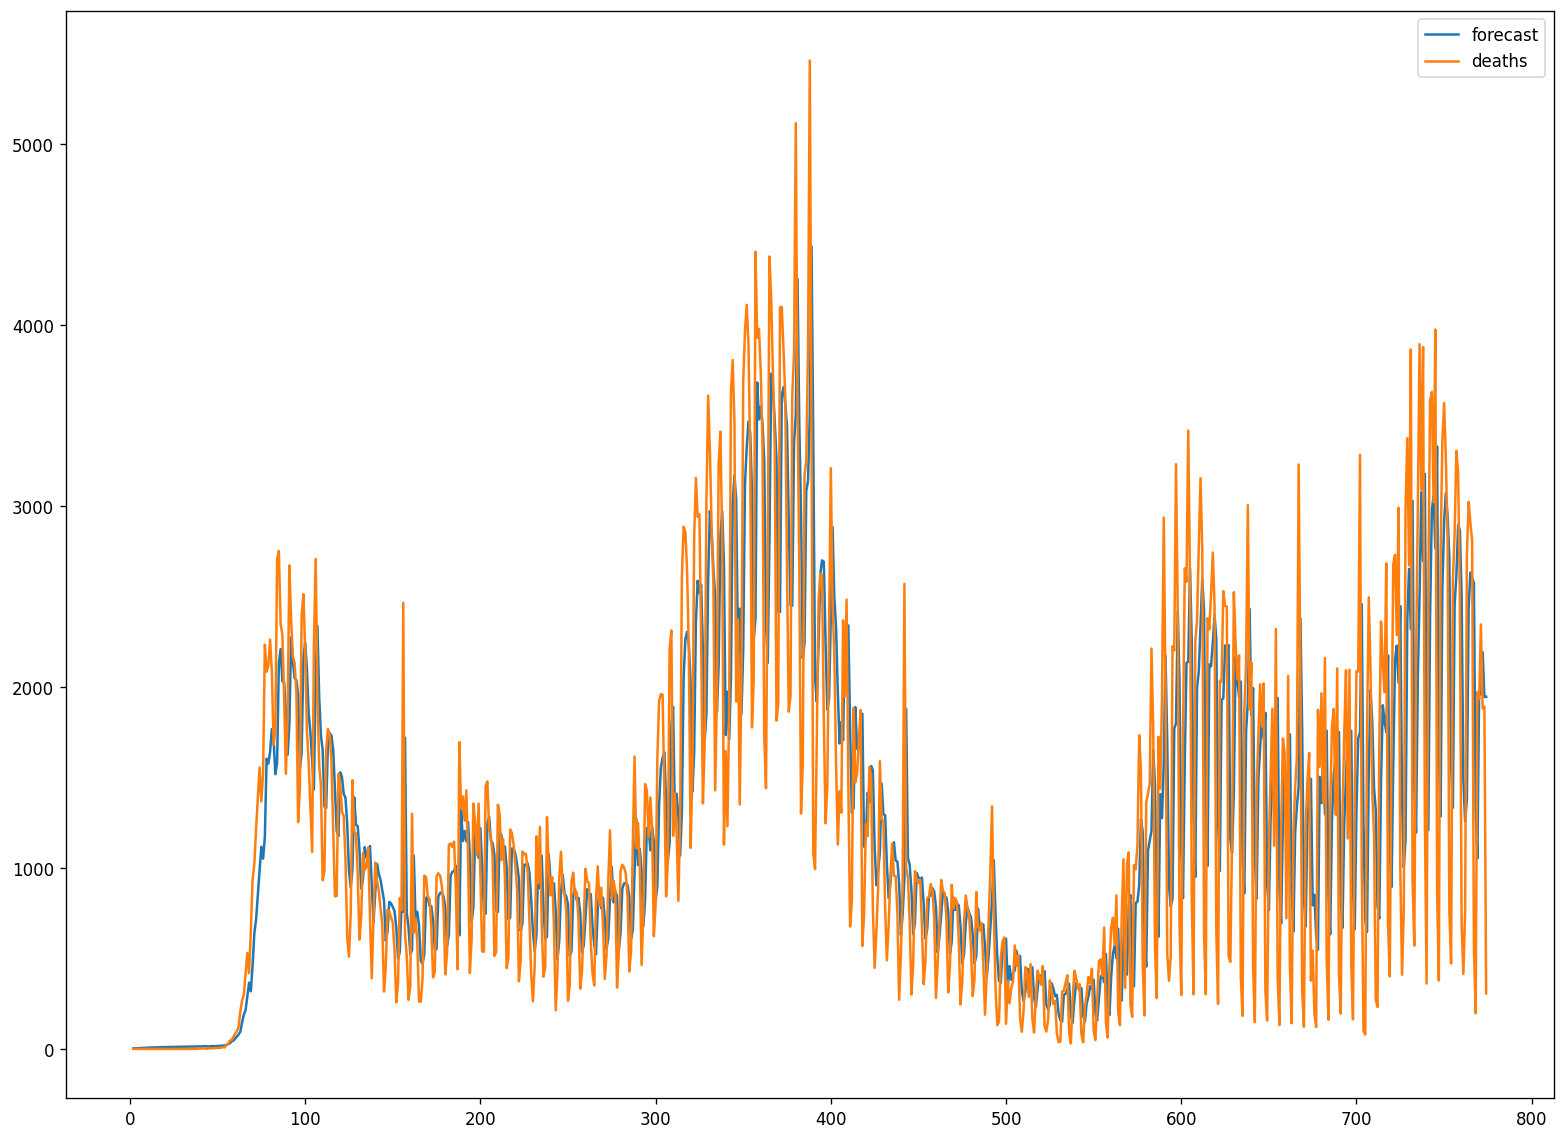

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(16,12), 'figure.dpi':120})
model_fit.plot_predict(dynamic=False)
plt.show()

In [10]:
def plot_forecast(test,train,alphaval,titleval):
    model = ARIMA(train, order=(1, 1, 1))  
    fitted = model.fit(disp=-1)  
    fc, se, conf = fitted.forecast(315, alpha=alphaval) 
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='Training')
    plt.plot(test, label='Actual')
    plt.plot(fc_series, label='Forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.30)
    plt.title(titleval)
    plt.legend(loc='lower left', fontsize=12)
    plt.show()

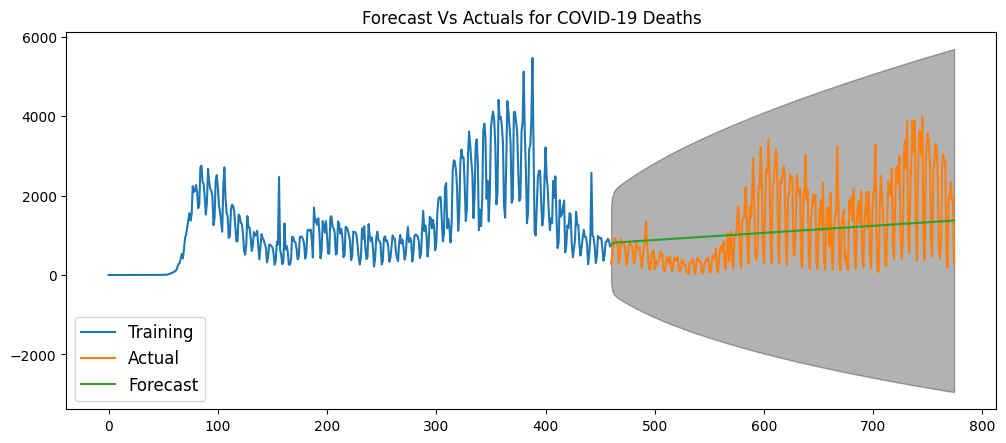

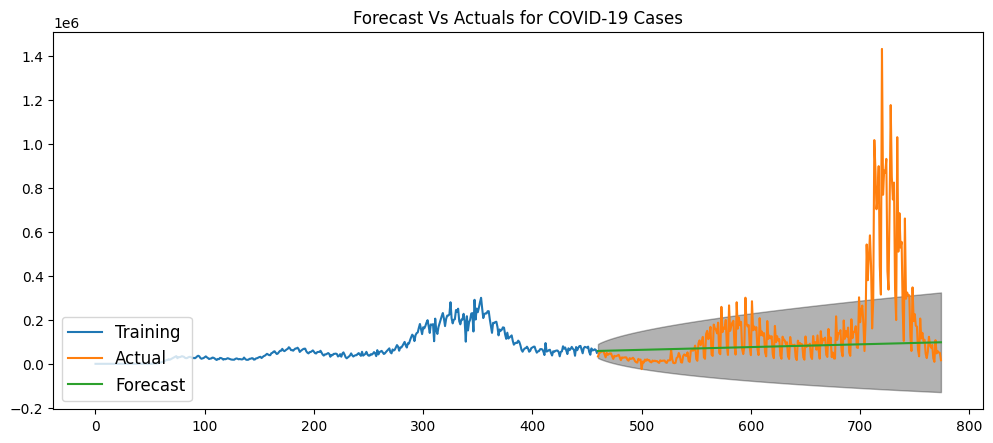

In [11]:
from statsmodels.tsa.stattools import acf
train = df.deaths[:460]
test = df.deaths[460:]
plot_forecast(test,train,0.05, 'Forecast Vs Actuals for COVID-19 Deaths')
train = df.cases[:460]
test = df.cases[460:]
plot_forecast(test,train,0.05,  'Forecast Vs Actuals for COVID-19 Cases')

In [12]:
!pip install pmdarima
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df.deaths, start_p=1, start_q=1,
                      test='adf',       
                      max_p=2, max_q=3, 
                      m=1,              
                      d=None,          
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

model2 = pm.auto_arima(df.cases, start_p=1, start_q=1,
                      test='adf',       
                      max_p=3, max_q=3, 
                      m=1,              
                      d=None,          
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model2.summary())

     |████████████████████████████████| 1.4 MB 596 kB/s 
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12153.278, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12316.328, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12317.800, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12317.216, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12314.329, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12013.815, Time=1.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12258.364, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11825.275, Time=1.65 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12079.786, Time=1.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11727.633, Time=1.94 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12012.391, Time=1.57 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=11676.691, Time=1.34 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=12010.474, Time=0.83 sec
 ARIMA(2,1,2)(0,0,0)[0]      

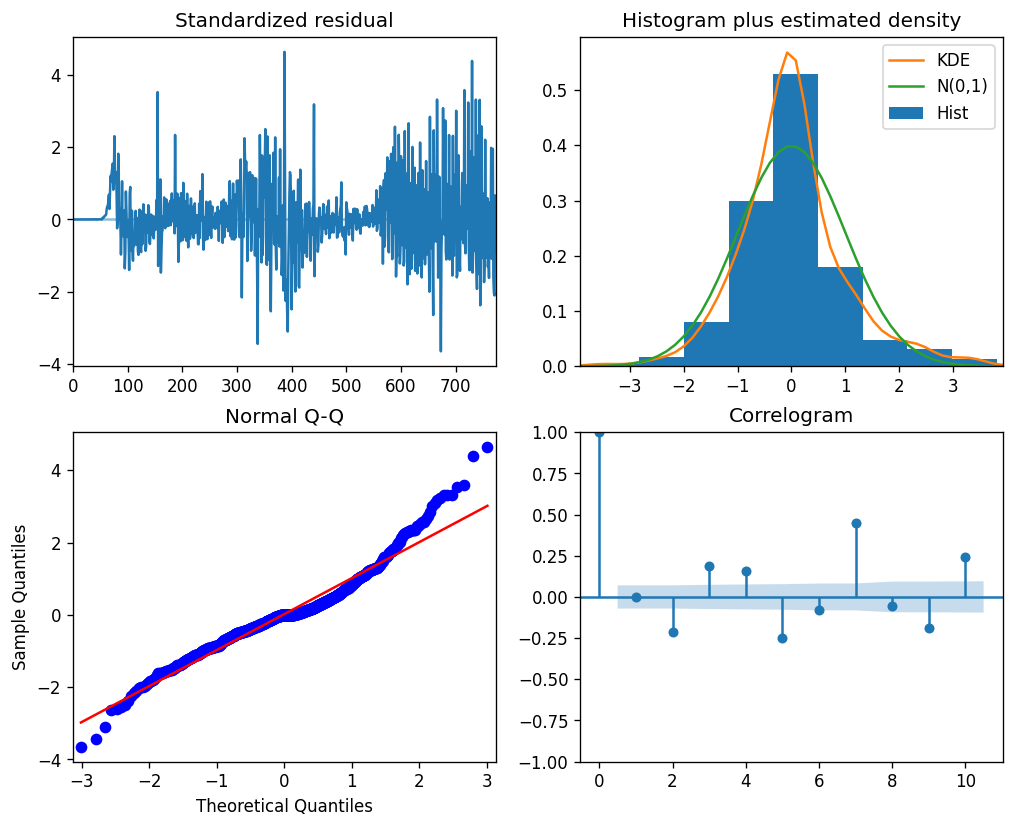

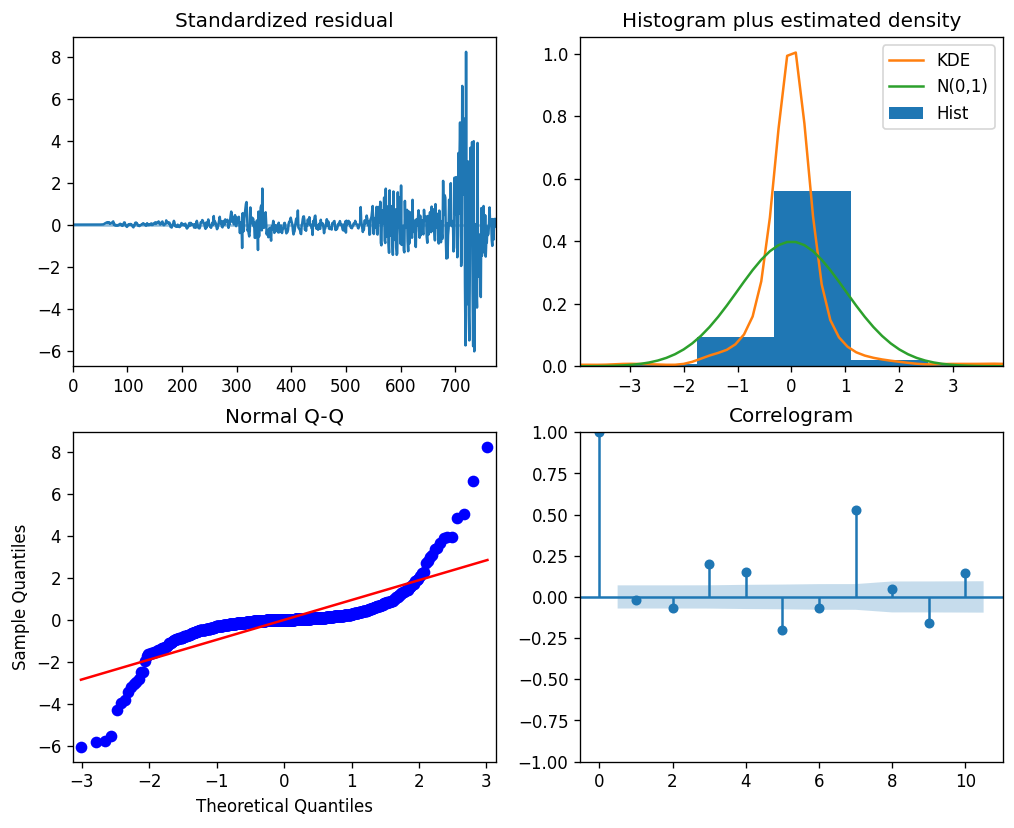

In [13]:
model.plot_diagnostics(figsize=(10,8))
plt.show()
model2.plot_diagnostics(figsize=(10,8))
plt.show()

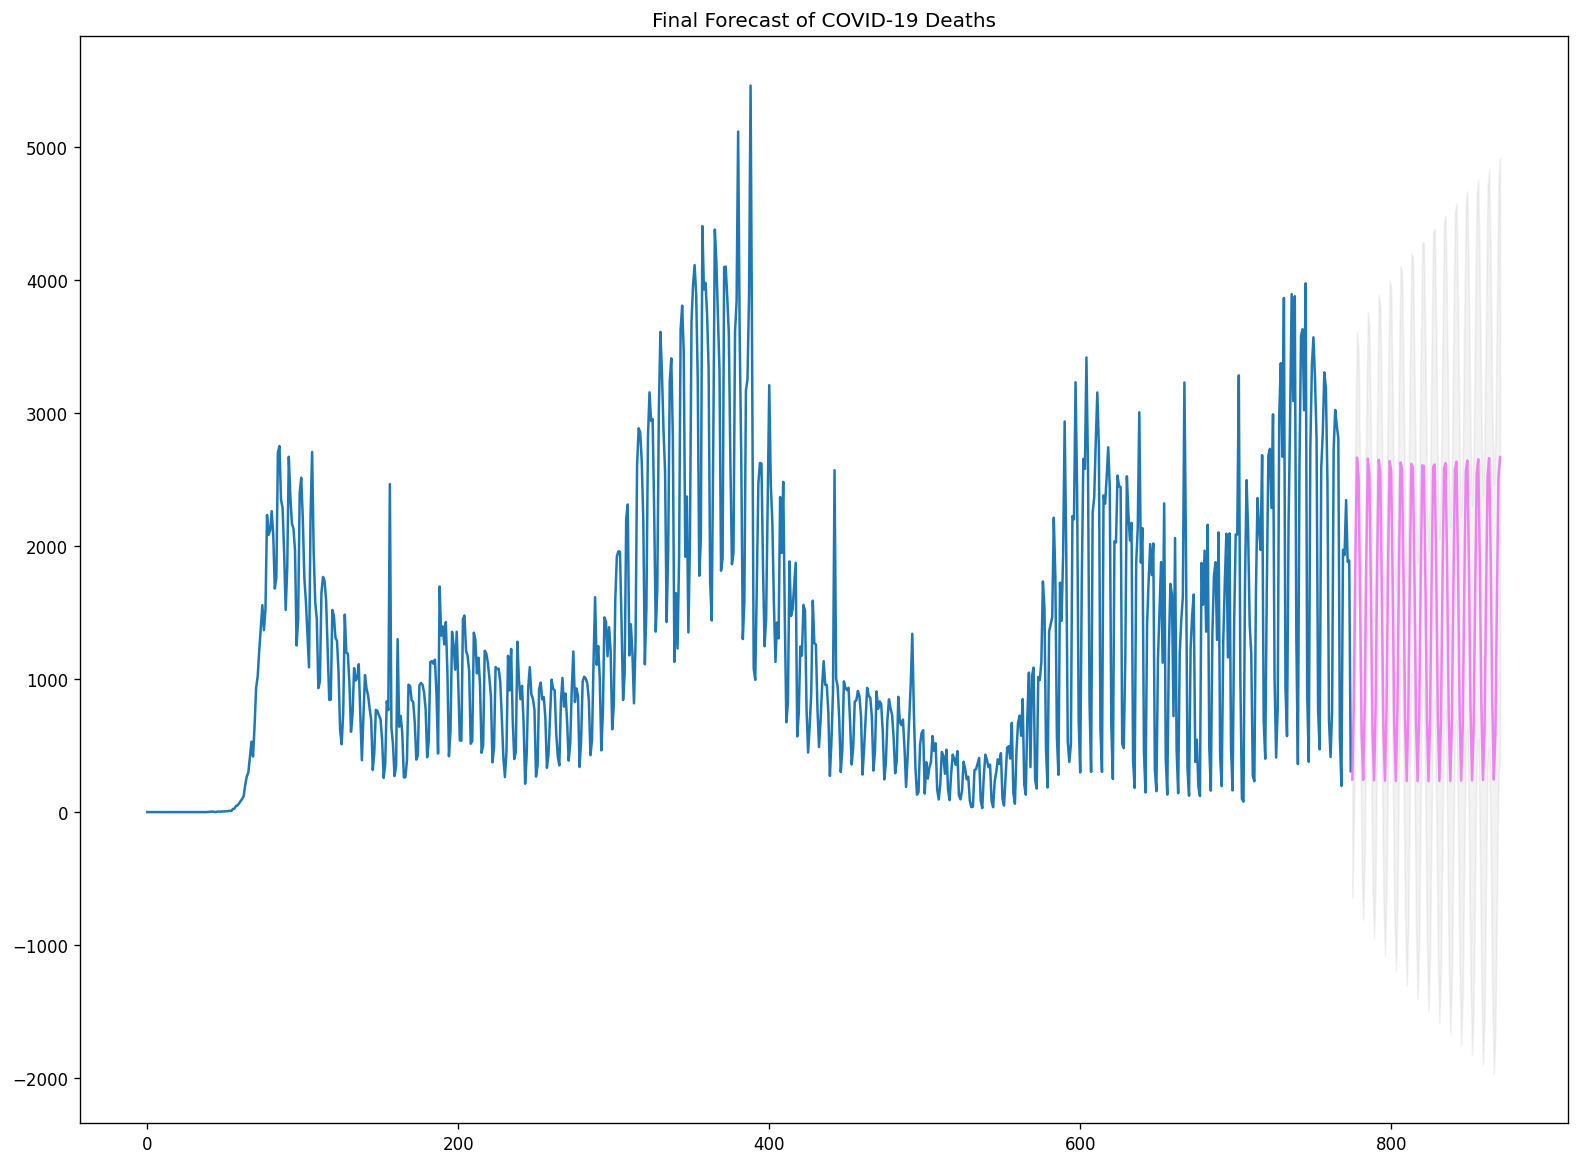

In [14]:
n_periods = 96
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.deaths), len(df.deaths)+n_periods)
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)
plt.plot(df.deaths)
plt.plot(fc_series, color='violet')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.05)
plt.title("Final Forecast of COVID-19 Deaths")
plt.show()

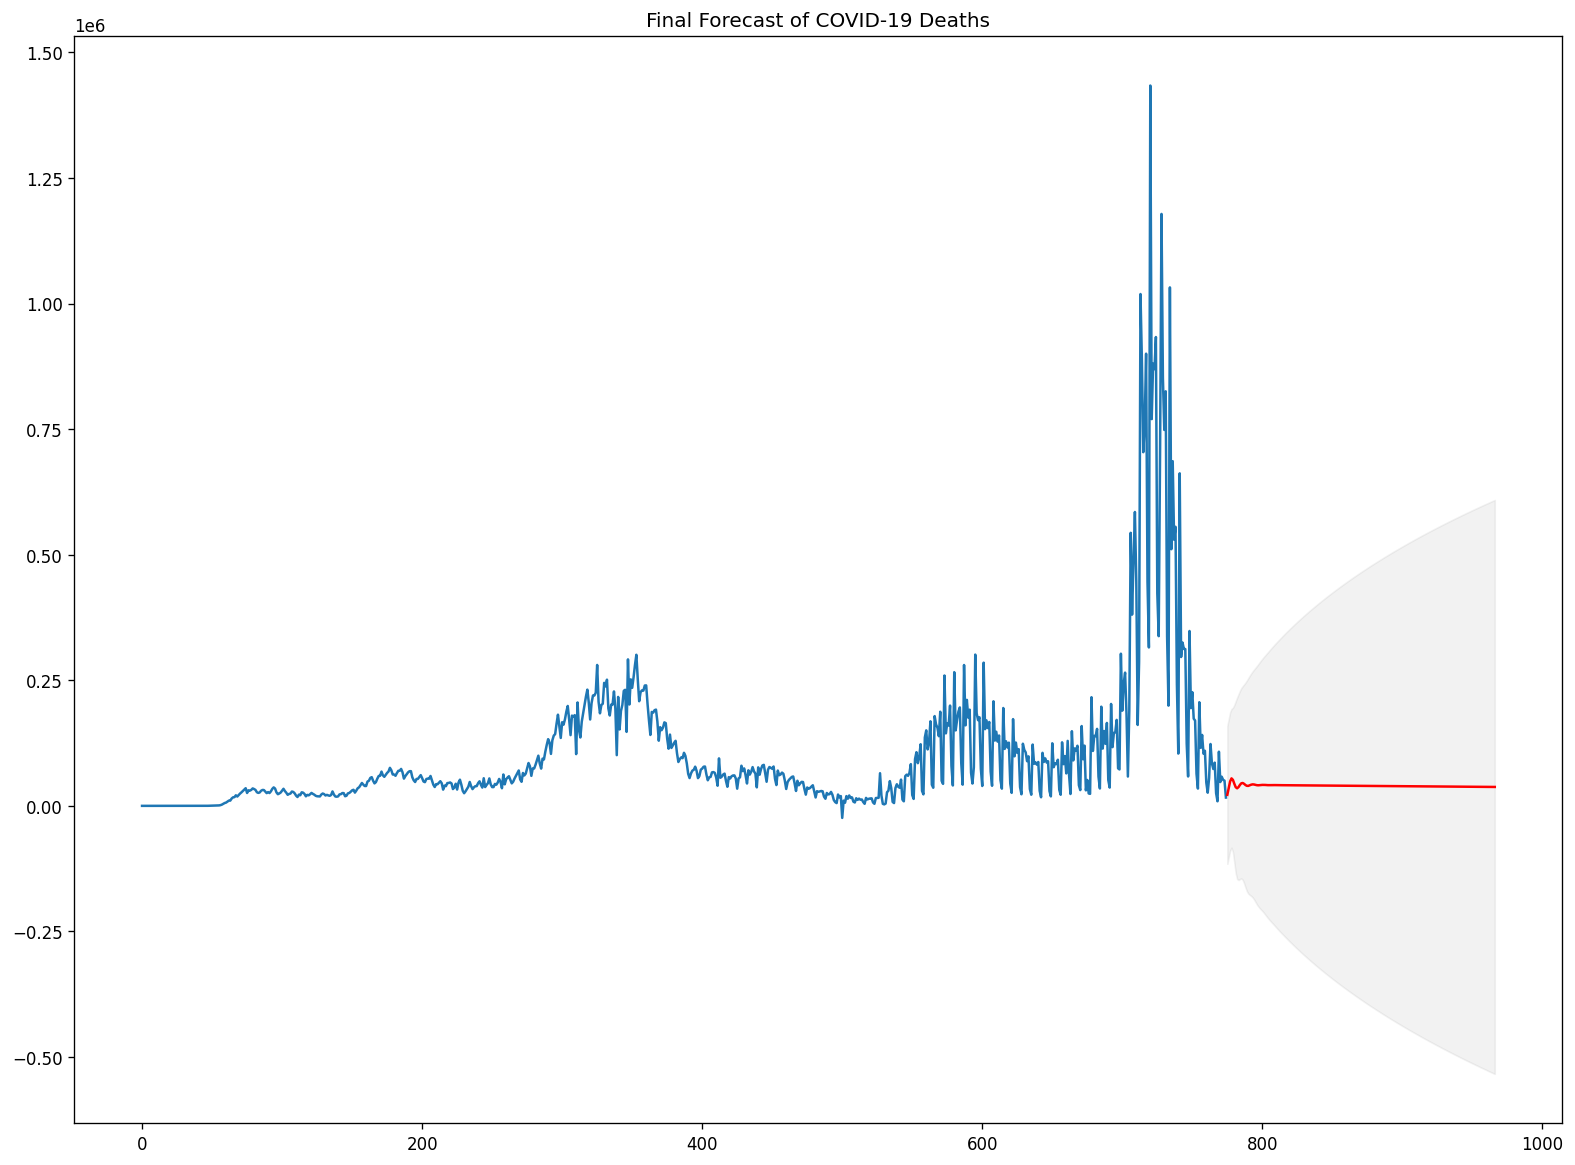

In [15]:
n_periods = 192
fc, confint = model2.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.cases), len(df.cases)+n_periods)
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)
plt.plot(df.cases)
plt.plot(fc_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.05)
plt.title("Final Forecast of COVID-19 Deaths")
plt.show()

In [16]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.20,random_state=45)
x_train2,x_test2,y_train2,y_test2=train_test_split(df_x,y2,test_size=0.20,random_state=45)

In [17]:
#Machine Learning for Cases

model = [AdaBoostRegressor(),
         ARDRegression(),
         BayesianRidge(),
         CCA(),
         DecisionTreeRegressor(),
         ElasticNet(),
         ElasticNetCV(),
         ExtraTreeRegressor(),
         GaussianProcessRegressor(),
         GradientBoostingRegressor(),
         HuberRegressor(),
         #IsotonicRegression(), #Not feasible with the dataset
         KernelRidge(),
         KNeighborsRegressor(),
         #LabelEncoder(), #Not feasible with the dataset
         Lars(),
         LarsCV(),
         Lasso(),
         LassoCV(),
         LassoLars(),
         LassoLarsCV(),
         LassoLarsIC(),
         LinearRegression(),
         LinearSVR(),
         MLPRegressor(),
         #MultiOutputRegressor(), #Not feasible with the dataset
         #MultiTaskElasticNet(),
         #MultiTaskElasticNetCV(),
         #MultiTaskLasso(),
         #MultiTaskLassoCV(),
         OrthogonalMatchingPursuit(),
         OrthogonalMatchingPursuitCV(),
         PassiveAggressiveRegressor(),
         #PCA(), #Not feasible with the dataset
         PLSCanonical(),
         PLSRegression(),
         RadiusNeighborsRegressor(),
         #RandomizedLogisticRegression(), #Not feasible with the dataset
         RANSACRegressor(),
         Ridge(),
         RidgeCV(),
         SGDRegressor(),
         #StandardScaler(),#Not feasible with the dataset
         SVR(),
         TheilSenRegressor(),
         NuSVR()
]
model_name = []
model_score = []
model_mae = []
model_mse = []
model_rmse = []
model_r2= []

for m in model:
    #print(m)
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    model_name.append(m) 
    model_score.append(score) 
    model_mae.append(mean_absolute_error(y_test,predm))
    model_mse.append(mean_squared_error(y_test,predm))
    model_rmse.append(np.sqrt(mean_squared_error(y_test,predm)))
    model_r2.append(r2_score(y_test,predm))

list_of_models = list(zip(model_name,
                          model_score,
                          model_mae,
                          model_mse,
                          model_rmse,
                          model_r2
                         )
                     )
list_of_models
dfm = pd.DataFrame(list_of_models,columns=['Model','Score','MAE','MSE','RMSE','R2 Score'])
dfm.sort_values('Score', ascending=False)
dfm.style.background_gradient(cmap ='RdYlGn')


In [18]:
print("*" * 40)
print("The Best Model is : ")
print("*" * 40)
print(dfm.loc[dfm['Score'].idxmax()])
print("*" * 40)

****************************************
The Best Model is : 
****************************************
Model       ARDRegression()
Score                   1.0
MAE                     0.0
MSE                     0.0
RMSE                    0.0
R2 Score                1.0
Name: 1, dtype: object
****************************************


In [19]:
print("*" * 40)
print("The Best R2 Score is : ")
print("*" * 40)
print(dfm.loc[dfm['R2 Score'].idxmax()])
print("*" * 40)

****************************************
The Best R2 Score is : 
****************************************
Model       ARDRegression()
Score                   1.0
MAE                     0.0
MSE                     0.0
RMSE                    0.0
R2 Score                1.0
Name: 1, dtype: object
****************************************


In [20]:
#Machine LEarning for Deaths
model = [AdaBoostRegressor(),
         ARDRegression(),
         BayesianRidge(),
         CCA(),
         DecisionTreeRegressor(),
         ElasticNet(),
         ElasticNetCV(),
         ExtraTreeRegressor(),
         GaussianProcessRegressor(),
         GradientBoostingRegressor(),
         HuberRegressor(),
         #IsotonicRegression(), #Not feasible with the dataset
         KernelRidge(),
         KNeighborsRegressor(),
         #LabelEncoder(), #Not feasible with the dataset
         Lars(),
         LarsCV(),
         Lasso(),
         LassoCV(),
         LassoLars(),
         LassoLarsCV(),
         LassoLarsIC(),
         LinearRegression(),
         LinearSVR(),
         MLPRegressor(),
         #MultiOutputRegressor(), #Not feasible with the dataset
         #MultiTaskElasticNet(),
         #MultiTaskElasticNetCV(),
         #MultiTaskLasso(),
         #MultiTaskLassoCV(),
         OrthogonalMatchingPursuit(),
         OrthogonalMatchingPursuitCV(),
         PassiveAggressiveRegressor(),
         #PCA(), #Not feasible with the dataset
         PLSCanonical(),
         PLSRegression(),
         RadiusNeighborsRegressor(),
         #RandomizedLogisticRegression(), #Not feasible with the dataset
         RANSACRegressor(),
         Ridge(),
         RidgeCV(),
         SGDRegressor(),
         #StandardScaler(),#Not feasible with the dataset
         SVR(),
         TheilSenRegressor(),
         NuSVR()
]
model_name = []
model_score = []
model_mae = []
model_mse = []
model_rmse = []
model_r2= []

for m in model:
    #print(m)
    m.fit(x_train2,y_train2)
    score=m.score(x_train2,y_train2)
    predm=m.predict(x_test2)
    model_name.append(m) 
    model_score.append(score) 
    model_mae.append(mean_absolute_error(y_test2,predm))
    model_mse.append(mean_squared_error(y_test2,predm))
    model_rmse.append(np.sqrt(mean_squared_error(y_test2,predm)))
    model_r2.append(r2_score(y_test2,predm))

list_of_models = list(zip(model_name,
                          model_score,
                          model_mae,
                          model_mse,
                          model_rmse,
                          model_r2
                         )
                     )
list_of_models
dfm2 = pd.DataFrame(list_of_models,columns=['Model2','Score2','MAE2','MSE2','RMSE2','R2 Score2'])
dfm2.sort_values('Score2', ascending=False)
dfm2.style.background_gradient(cmap ='RdYlGn')

In [21]:
print("*" * 40)
print("The Best Model for forecasting COVID-19 deaths is : ")
print("*" * 40)
print(dfm2.loc[dfm2['Score2'].idxmax()])
print("*" * 40)
print("The Best Model with best R2 Score: ")
print("*" * 40)
print(dfm2.loc[dfm2['R2 Score2'].idxmax()])
print("*" * 40)

****************************************
The Best Model for forecasting COVID-19 deaths is : 
****************************************
Model2       ARDRegression()
Score2                   1.0
MAE2                     0.0
MSE2                     0.0
RMSE2                    0.0
R2 Score2                1.0
Name: 1, dtype: object
****************************************
The Best Model with best R2 Score: 
****************************************
Model2       ARDRegression()
Score2                   1.0
MAE2                     0.0
MSE2                     0.0
RMSE2                    0.0
R2 Score2                1.0
Name: 1, dtype: object
****************************************
